In [2]:
import pandas as pd

In [4]:
# http://en.wikipedia.org/wiki/Gun_violence_in_the_United_States_by_state
guns = pd.read_csv("data/guns.txt")
guns = guns[guns.state != 'District of Columbia']
print guns

              state  population  population_density  murders  gun_murders  \
0           Alabama     4779736              94.650      199          135   
1            Alaska      710231               1.264       31           19   
2           Arizona     6392017              57.050      352          232   
3          Arkansas     2915918              56.430      130           93   
4        California    37253956             244.200     1811         1257   
5          Colorado     5029196              49.330      117           65   
6       Connecticut     3574097             741.400      131           97   
7          Delaware      897934             470.700       48           38   
9           Florida    19687653             360.200      987          669   
10          Georgia     9920000             172.500      527          376   
11           Hawaii     1360301             216.800       24            7   
12            Idaho     1567582              19.500       21           12   

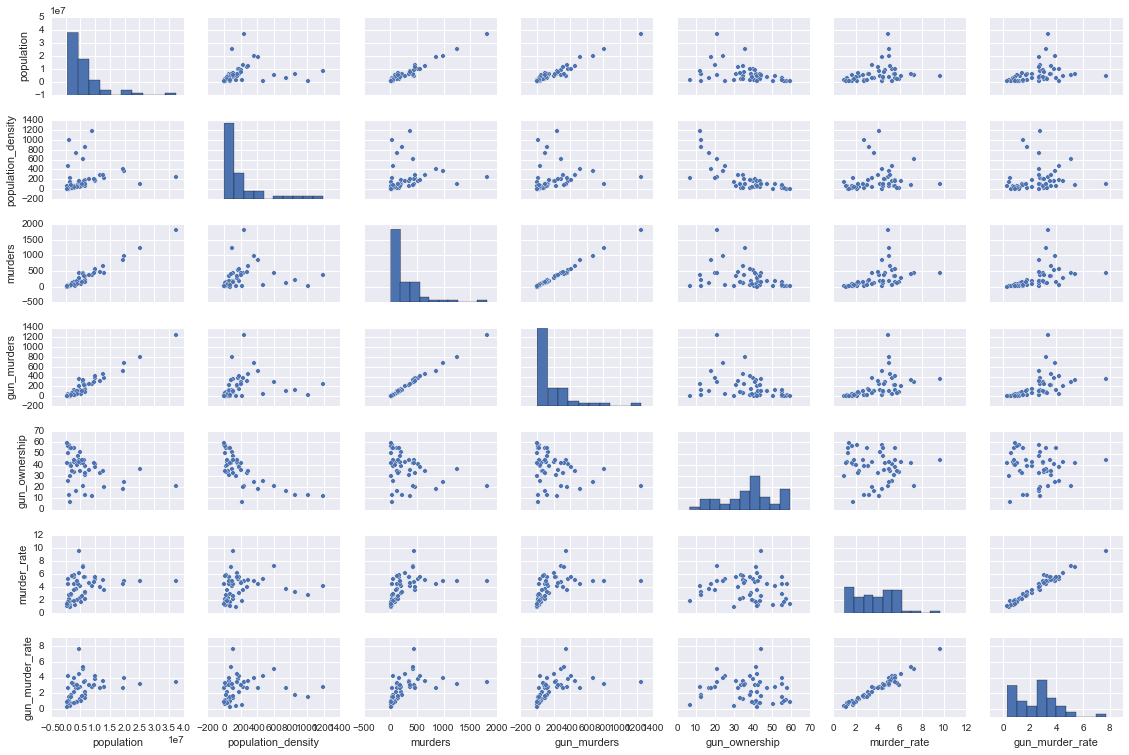

In [5]:
%matplotlib inline
import seaborn as sns
sns.pairplot(guns, size=1.5, aspect=1.5)

In [ ]:
# add variables
# median household income
# median age
# ethnicity (careful with this!)
# education level (how to quantify?)

In [6]:
import statsmodels.formula.api as smf
lm = smf.ols('murders ~ population', data=guns).fit()
print fit.summary()

NameError: name 'fit' is not defined

In [ ]:
fit = smf.ols('gun_murder_rate ~ population_density', data=guns).fit()
print fit.pvalues
print fit.summary()

In [7]:
fit = smf.ols('gun_murder_rate ~ gun_ownership', data=guns).fit()
print fit.pvalues
print fit.summary()

Intercept        0.000034
gun_ownership    0.475355
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        gun_murder_rate   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5176
Date:                Tue, 02 Jun 2015   Prob (F-statistic):              0.475
Time:                        17:58:22   Log-Likelihood:                -90.827
No. Observations:                  50   AIC:                             185.7
Df Residuals:                      48   BIC:                             189.5
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.9594      0.647      4.571      0.000 

In [8]:
fit = smf.ols('gun_murder_rate ~ gun_ownership + population_density', data=guns).fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:        gun_murder_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5555
Date:                Tue, 02 Jun 2015   Prob (F-statistic):              0.578
Time:                        17:58:32   Log-Likelihood:                -90.511
No. Observations:                  50   AIC:                             187.0
Df Residuals:                      47   BIC:                             192.8
Df Model:                           2                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.2502      1.124      2.002      0.051        -0.011     4.512
gun_ownership          0.002

In [9]:
fit = smf.ols('murder_rate ~ population_density', data=guns).fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:            murder_rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9515
Date:                Tue, 02 Jun 2015   Prob (F-statistic):              0.334
Time:                        17:58:41   Log-Likelihood:                -101.57
No. Observations:                  50   AIC:                             207.1
Df Residuals:                      48   BIC:                             211.0
Df Model:                           1                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              3.6427      0.334     10.893      0.000         2.970     4.315
population_density     0.001

In [10]:
import sklearn.linear_model as linear_model
import numpy as np
import matplotlib.pyplot as plt

def fit_and_plot(x, y, xlim):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    print "residuals", regr.residues_
    print "Coefficients: \n", regr.coef_

    # The mean square error
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(x) - y) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))
    print "intercept", regr.intercept_

    plt.scatter(x, y, color='black', s=1)
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)
    plt.xlim(xlim)
    plt.show()

residuals 109.373753907
Coefficients: 
[ 0.00087592]
Residual sum of squares: 2.19
Variance score: 0.02
intercept 2.34789845531


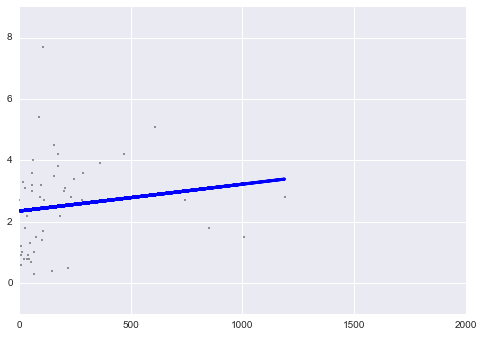

In [11]:
x = guns['population_density'].values.reshape(-1,1)
y = guns['gun_murder_rate'].values

fit_and_plot(x, y, (0, 2000))

residuals 110.745787399
Coefficients: 
[-0.0116814]
Residual sum of squares: 2.21
Variance score: 0.01
intercept 2.95936071248


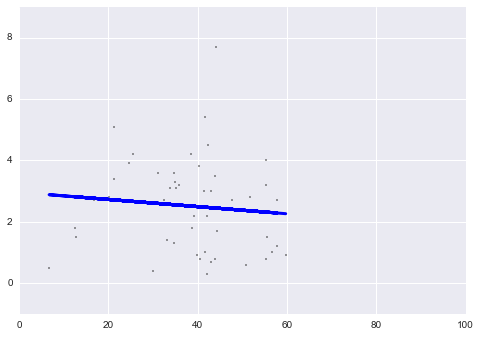

In [12]:
x = guns['gun_ownership'].values.reshape(-1,1)
y = guns['gun_murder_rate'].values

fit_and_plot(x, y, (0, 100))

residuals 109.373753907
Coefficients: 
[ 0.00087592]
Residual sum of squares: 2.19
Variance score: 0.02
intercept 2.34789845531


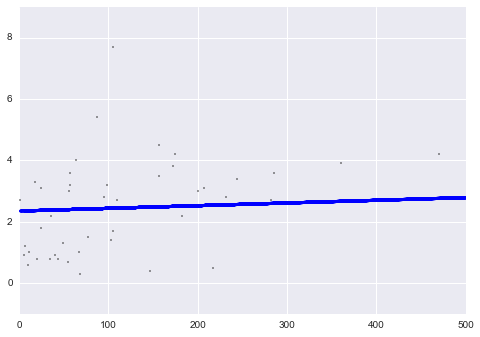

In [13]:
x = guns['population_density'].values.reshape(-1,1)
y = guns['gun_murder_rate'].values

fit_and_plot(x, y, (0, 500))

In [14]:
house_income = pd.read_csv('data/household_income_2010.txt')

In [20]:
#print house_income
print house_income.sort(['state'])['state']

45           Alabama
1             Alaska
29           Arizona
47          Arkansas
9         California
14          Colorado
3        Connecticut
10          Delaware
36           Florida
32           Georgia
7             Hawaii
39             Idaho
17          Illinois
30           Indiana
23              Iowa
25            Kansas
46          Kentucky
43         Louisiana
31             Maine
0           Maryland
4      Massachusetts
33          Michigan
8          Minnesota
49       Mississippi
35          Missouri
37           Montana
21          Nebraska
26            Nevada
5      New Hampshire
2         New Jersey
42        New Mexico
15          New York
38    North Carolina
19      North Dakota
34              Ohio
40          Oklahoma
28            Oregon
22      Pennsylvania
16      Rhode Island
41    South Carolina
27      South Dakota
44         Tennessee
24             Texas
13              Utah
18           Vermont
6           Virginia
11        Washington
48     West V